In [139]:
import numpy as np
import json
import os
import matplotlib.pyplot as plt
from collections import OrderedDict
from operator import *
import re
import copy

### get directories

In [140]:
#*************EDIT PATH***************
# path to results directory
results_dir = 'results'

sub_dir = os.listdir(results_dir)

uniform = []
good_starts = []
all_previous = []

# collect directory names of the sampling methods
for dir in sub_dir:
    #sampling_method = re.search('\d_(.[^_]+?)_\d', dir).group().split('_')[1]
    if 'uniform' in dir:
        uniform.append(dir)
    elif 'good_starts' in dir:
        good_starts.append(dir)
    else:
        all_previous.append(dir)        


### uniform sampling

In [141]:
uniform_data = []

# get all evaluation data
for dir in uniform:
    path = os.path.join(results_dir, dir)
    file = ([f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))][0])
    
    with open(os.path.join(path, file)) as f:
        uniform_data.append(json.load(f))

        
uniform_data_copy = []
        
# get average succes probability per iteration per file
for data in uniform_data:
    for it in data:
        goals = data[it]
        sums = np.sum(goals)
        prob = sums / len(goals)
        data[it] = prob
    uniform_data_copy.append(data)

# get one dictionary with all runs
all_in_one_dict = {}
for k in uniform_data_copy[0].keys():
    all_in_one_dict[k] = [d[k] for d in uniform_data_copy]

# get means and variances per iteration
uniform_means = []
uniform_variances = []

for k in all_in_one_dict.keys():
    mean = np.mean(all_in_one_dict[k])
    uniform_means.append(mean)
    var = np.var(all_in_one_dict[k])
    uniform_variances.append(var)

#print(uniform_data)
#print(all_in_one_dict)
#print(uniform_means)
#print(uniform_variances)


### good starts

In [142]:
good_starts_data = []

# get all evaluation data
for dir in good_starts:
    path = os.path.join(results_dir, dir)
    file = ([f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))][0])
    
    with open(os.path.join(path, file)) as f:
        good_starts_data.append(json.load(f))      
        
good_starts_data_copy = []
        
# get average succes probability per iteration per file
for data in good_starts_data:
    for it in data:
        goals = data[it]
        sums = np.sum(goals)
        prob = sums / len(goals)
        data[it] = prob
    good_starts_data_copy.append(data)

# get one dictionary with all runs
all_in_one_dict = {}
for k in good_starts_data_copy[0].keys():
    all_in_one_dict[k] = [d[k] for d in good_starts_data_copy]

# get means and variances per iteration
good_starts_means = []
good_starts_variances = []

for k in all_in_one_dict.keys():
    mean = np.mean(all_in_one_dict[k])
    good_starts_means.append(mean)
    var = np.var(all_in_one_dict[k])
    good_starts_variances.append(var)

#print(good_starts_data)
#print(all_in_one_dict)
#print(good_starts_means)
#print(good_starts_variances)


### previous starts

In [143]:
all_previous_data = []

# get all evaluation data
for dir in all_previous:
    path = os.path.join(results_dir, dir)
    file = ([f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))][0])
    
    with open(os.path.join(path, file)) as f:
        all_previous_data.append(json.load(f))

        
all_previous_data_copy = []
        
# get average succes probability per iteration per file
for data in all_previous_data:
    for it in data:
        goals = data[it]
        sums = np.sum(goals)
        prob = sums / len(goals)
        data[it] = prob
    all_previous_data_copy.append(data)

# get one dictionary with all runs
all_in_one_dict = {}
for k in all_previous_data_copy[0].keys():
    all_in_one_dict[k] = [d[k] for d in all_previous_data_copy]

# get means and variances per iteration
all_previous_means = []
all_previous_variances = []

for k in all_in_one_dict.keys():
    mean = np.mean(all_in_one_dict[k])
    all_previous_means.append(mean)
    var = np.var(all_in_one_dict[k])
    all_previous_variances.append(var)

#print(all_previous_data)
#print(all_in_one_dict)
#print(all_previous_means)
#print(all_previous_variances)


### plot curve

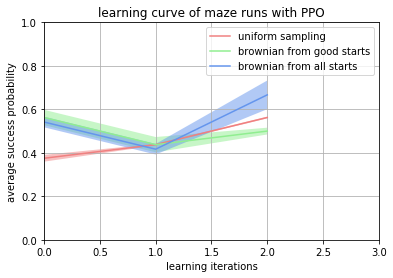

In [146]:
iterations = range(len(all_in_one_dict.keys()))

fig, ax = plt.subplots(1)

#uniform
ax.plot(iterations, uniform_means, label = 'uniform sampling', color='lightcoral')
ax.fill_between(iterations, np.array(uniform_means)+np.array(uniform_variances), np.array(uniform_means)-np.array(uniform_variances), facecolor='lightcoral', alpha=0.5)
# good_starts
ax.plot(iterations, good_starts_means, label = 'brownian from good starts', color='lightgreen')
ax.fill_between(iterations, np.array(good_starts_means)+np.array(good_starts_variances), np.array(good_starts_means)-np.array(good_starts_variances), facecolor='lightgreen', alpha=0.5)
# all_previous
ax.plot(iterations, all_previous_means, label = 'brownian from all starts', color='cornflowerblue')
ax.fill_between(iterations, np.array(all_previous_means)+np.array(all_previous_variances), np.array(all_previous_means)-np.array(all_previous_variances), facecolor='cornflowerblue', alpha=0.5)

plt.grid(True)
plt.xlabel("learning iterations")
plt.ylabel("average success probability")
plt.ylim(0,1,0.2)
plt.xlim(0,len(all_in_one_dict.keys()),1)

plt.legend()
plt.title("learning curve of maze runs with PPO")

if not os.path.exists("plots"):
    os.mkdir("plots")

plt.savefig('plots/maze_ppo_learning_curve.png', dpi=250)
plt.show()